# Titanic classification

**G Henry Jacob**

1st June 2021

### Introduction

Titanic data set contains details of passengers who traveled in Titanic and the target variable is a binary variable which shows whether the passenger survived or not.

##### Data can be found at <code>[here](https://www.kaggle.com/hesh97/titanicdataset-traincsv)<code>

![](https://akm-img-a-in.tosshub.com/indiatoday/titanic_647_041416113640.jpg?IWI8WJ3owRLPfIO2GUMAyyypPfwvvcRV)

### Methodology

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Collecting Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analysing Data

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


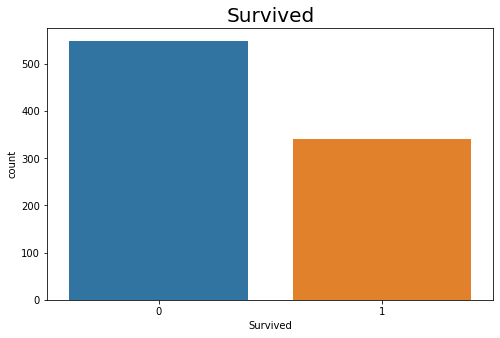

In [5]:
# to plot barplot
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Survived', data = df)
plt.title('Survived', size = 20)
plt.show()

In [6]:
# to see passenger survived
survived = df['Survived'].value_counts()
print(f'Passenger survived :{survived.values[1]} \nPassenger not survived :{survived.values[0]}')

Passenger survived :342 
Passenger not survived :549


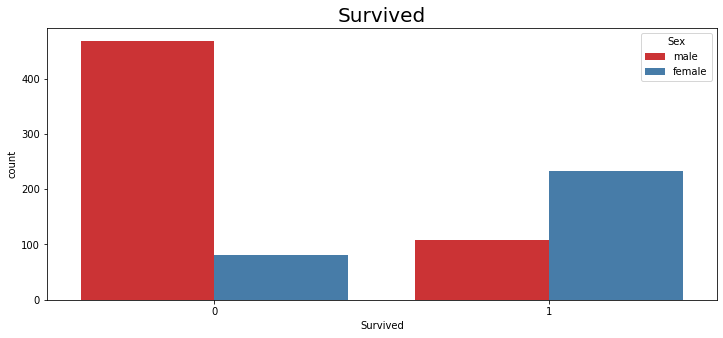

In [7]:
# to see survived genderwise
plt.figure(figsize = (12, 5))
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'Set1')
plt.title('Survived', size = 20)
plt.show()

More number of female and less number of male survived

In [8]:
male_df = df[df['Sex'] == 'male']
female_df = df[df['Sex'] == 'female']

In [9]:
male_survived = male_df[male_df['Survived'] == 1]
male_not_survived = male_df[male_df['Survived'] == 0]
female_survived = female_df[female_df['Survived'] == 1]
female_not_survived = female_df[female_df['Survived'] == 0]

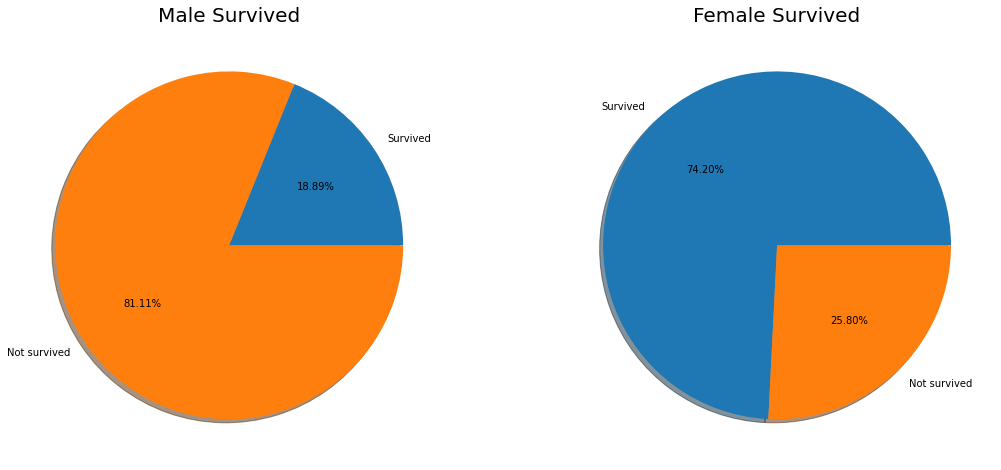

In [10]:
# to plot male survived
plt.figure(figsize=(18,8));
plt.subplot(121)
plt.pie(x = [male_survived.shape[0], male_not_survived.shape[0]], labels=['Survived', 'Not survived'], autopct='%.2f%%', shadow = True)
plt.title('Male Survived', size = 20);

# to plot female survived
ax2 = plt.subplot(122)
plt.pie(x = [female_survived.shape[0], female_not_survived.shape[0]], labels=['Survived', 'Not survived'], autopct='%.2f%%', shadow = True)
plt.title('Female Survived', size = 20);

19% of male survived and 74% of female survived

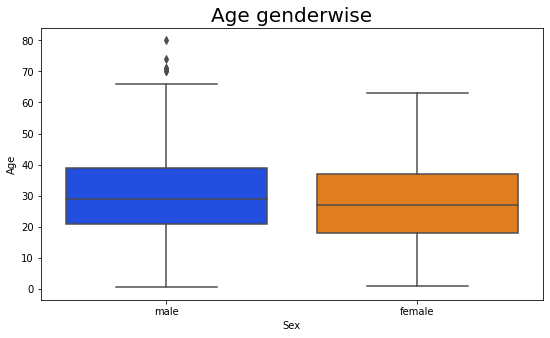

In [11]:
# to plot age genderwise in a boxplot
plt.figure(figsize = (9, 5))
sns.boxplot(x = 'Sex', y = 'Age', data = df, palette= 'bright')
plt.title('Age genderwise', size = 20)
plt.show()

female passengers travelled who have the maximum age range of 65 whereas male have 80

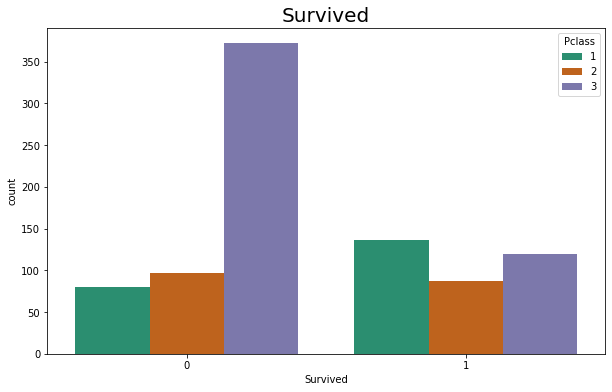

In [12]:
# to plot survived classwise
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette= 'Dark2')
plt.title('Survived', size = 20)
plt.show()

Passengers belongs to class 1 have more survival rate whereas passengers belongs to class 2 and class 3 have less survival rate

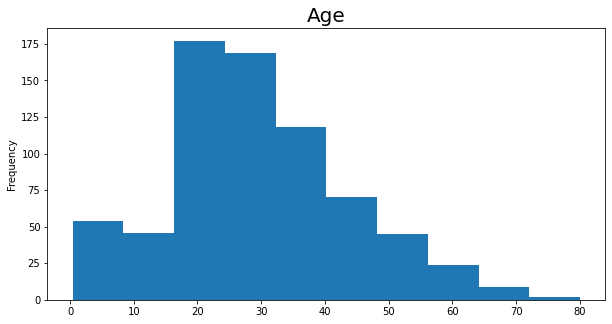

In [13]:
# to plot age in histogram
plt.figure(figsize = (10, 5))
df['Age'].plot(kind = 'hist')
plt.title('Age', size = 20)
plt.show()

More number of passengers have the age range of above 15 and below 40

Embarked column in the dataset refers to each different places. So we create a dictionary with embarked for further steps

In [14]:
embark_dict = {'C':'Cherbourg', 'Q':'Queenstown', 'S' : 'Southampton'}

In [15]:
embark_dict

{'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

More passengers travelled to Southampton and less passengers travelled to Queenstown

In [17]:
s_df = df[df['Embarked'] == 'S']
q_df = df[df['Embarked'] == 'Q']
c_df = df[df['Embarked'] == 'C']

In [18]:
s_pclass = s_df['Pclass'].value_counts()
s_pclass

3    353
2    164
1    127
Name: Pclass, dtype: int64

In [19]:
c_pclass = c_df['Pclass'].value_counts()
c_pclass

1    85
3    66
2    17
Name: Pclass, dtype: int64

In [20]:
q_pclass = q_df['Pclass'].value_counts()
q_pclass

3    72
2     3
1     2
Name: Pclass, dtype: int64

Passengers travelled to Southampton and Queenstown mostly used class 3, whereas passengers travelled to Cherbourg mostly used class 1

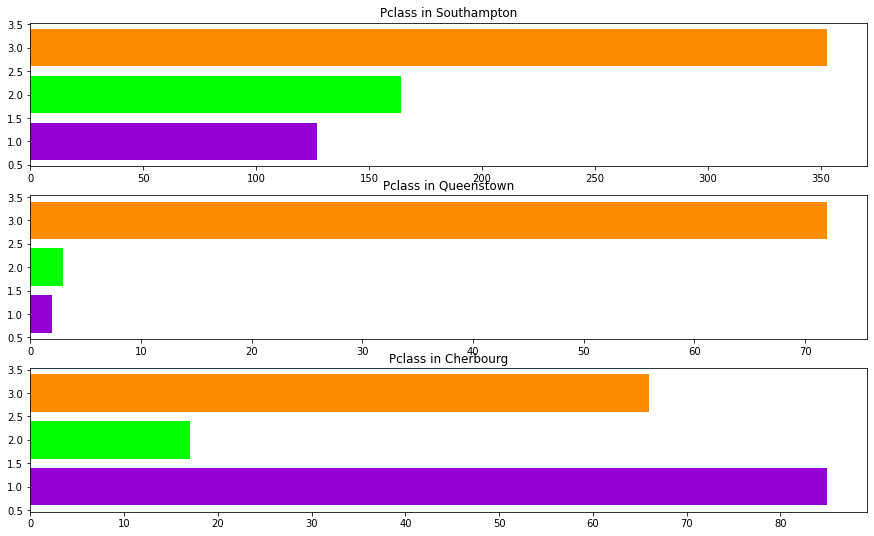

In [21]:
# to plot total number of passengers travelled in all classes and embarked 
color = ['darkorange', 'lime', 'darkviolet']
color_1 = [ 'darkviolet','darkorange', 'lime']
# to plot number of pclass in Southampton
plt.figure(figsize=(15, 9));
plt.subplot(311)
plt.barh(y = s_pclass.index, width = s_pclass.values, color = color)
plt.title('Pclass in Southampton', size = 12);

# to plot number of pclass in Queenstown
ax2 = plt.subplot(312)
plt.barh(y = q_pclass.index, width = q_pclass.values, color = color)
plt.title('Pclass in Queenstown', size = 12);

# to plot number of pclass in Cherbourg
ax2 = plt.subplot(313)
plt.barh(y = c_pclass.index, width = c_pclass.values, color = color_1)
plt.title('Pclass in Cherbourg', size = 12);

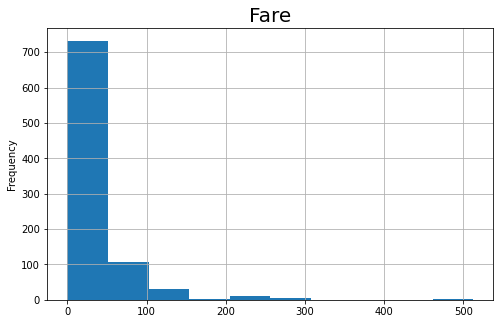

In [22]:
# to plot histogram
plt.figure(figsize = (8, 5))
df['Fare'].plot(kind = 'hist')
plt.title('Fare', size = 20)
plt.grid(True)
plt.show()

<a id='age_boxplot_cell'></a>

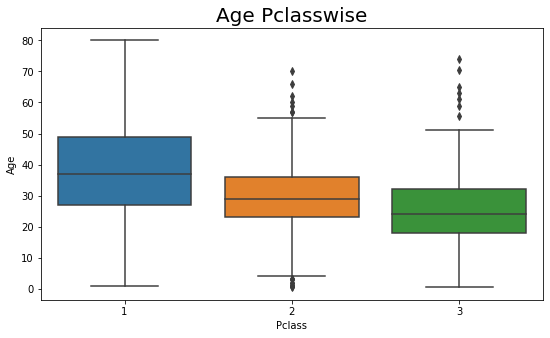

In [23]:
# to plot age classwise
plt.figure(figsize = (9, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.title('Age Pclasswise', size = 20)
plt.show()

Age range vary between each class

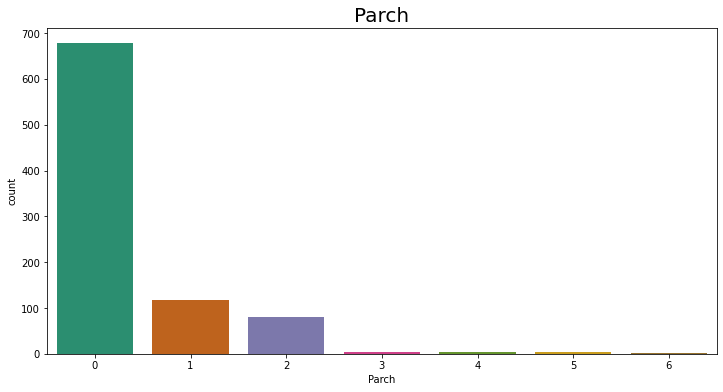

In [24]:
# to plot barplot
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Parch', data = df, palette='Dark2')
plt.title('Parch', size = 20)
plt.show()

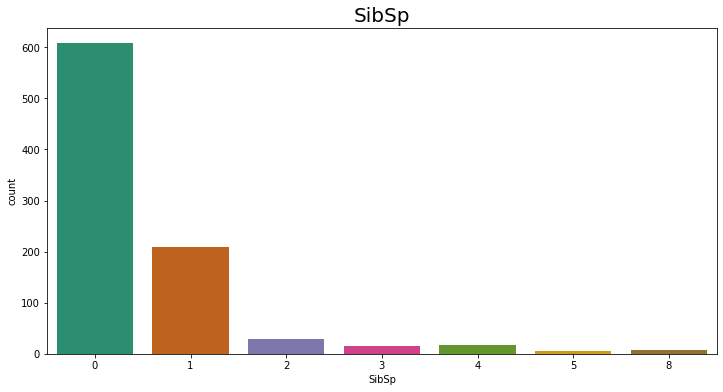

In [25]:
# to plot barplot
plt.figure(figsize = (12, 6))
sns.countplot(x = 'SibSp', data = df, palette='Dark2')
plt.title('SibSp', size = 20)
plt.show()

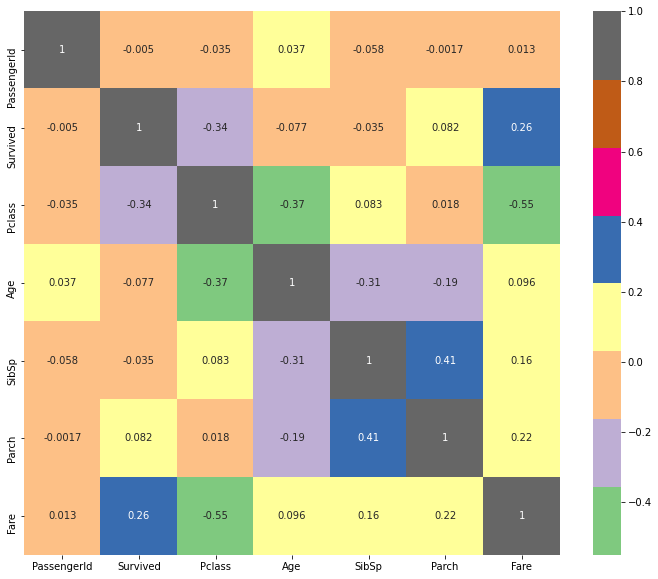

In [26]:
# to see correlation
plt.figure(figsize = (12, 10))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.Accent)
plt.show()

There is no high correlation between two columns

### Data Wrangling

In [27]:
# to see null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

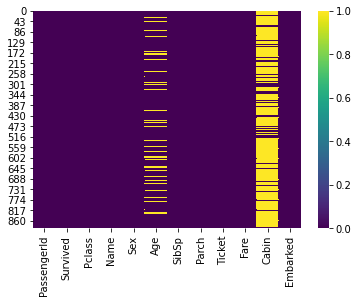

In [28]:
sns.heatmap(df.isnull(), cmap = 'viridis')

Age and Cabin have more null values

We are going to **replace the null values in Age** with **median** of age based on each Passenger class

As we saw above the Age is vary based on Passengerclass. ------> <code>[Age Pclasswise](#age_boxplot_cell)<code>

In [29]:
cls_1 = df[df['Pclass'] == 1]
cls_2 = df[df['Pclass'] == 2]
cls_3 = df[df['Pclass'] == 3]

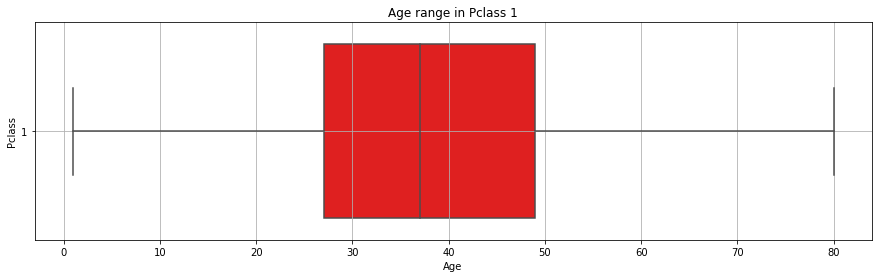

In [30]:
# to plot age in pcls 1
plt.figure(figsize=(15, 4));
sns.boxplot(y  = 'Pclass', x = 'Age', data = cls_1, orient = 'h', color = 'red')
plt.title('Age range in Pclass 1', size = 12)
plt.grid(True)
plt.show()

<a id='age_boxplot_classwise_cell'></a>

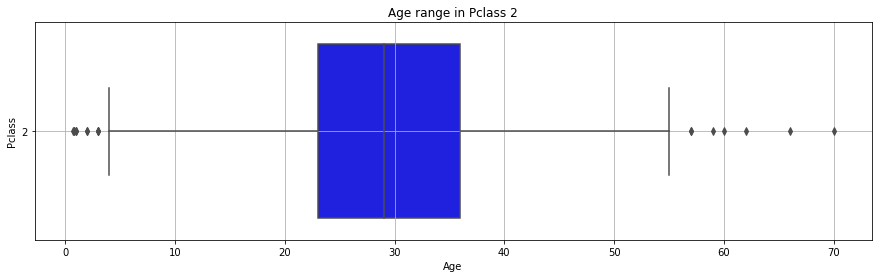

In [31]:
# to plot age in pcls 2
plt.figure(figsize=(15, 4));
sns.boxplot(y  = 'Pclass', x = 'Age', data = cls_2, orient = 'h', color = 'blue')
plt.title('Age range in Pclass 2', size = 12)
plt.grid(True)
plt.show()

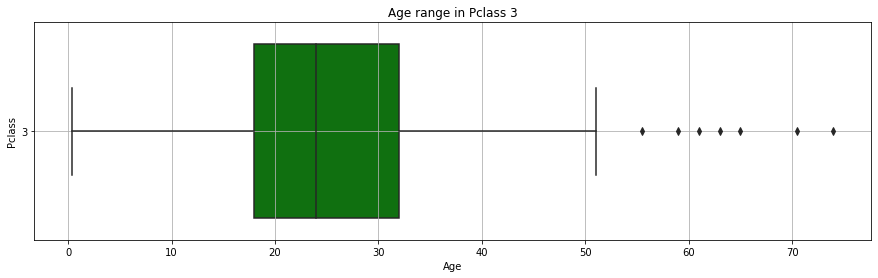

In [32]:
# to plot age in pcls 3
plt.figure(figsize=(15, 4));
sns.boxplot(y  = 'Pclass', x = 'Age', data = cls_3, orient = 'h', color = 'green')
plt.title('Age range in Pclass 3', size = 12)
plt.grid(True)
plt.show()

Pcls1 has the median age of 37<br>Pcls2 has the median age of 28<br>Pcls3 has the median age of 24

In [33]:
# define function to replace null values with median
def replace_null_age(col):
    age = col[0]
    pcls = col[1]
    
    if pd.isnull(age):
        if pcls == 1:
            return 37
        elif pcls == 2:
            return 28
        else:
            return 24
    else:
        return age

In [34]:
df['Age'] = df[['Age', 'Pclass']].apply(replace_null_age, axis = 1)

### Outlier detection and removal

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h4>Even if it looks like outliers present in boxplot which contains age with class,</h4>
<h4>There is possibile that the travelled passenger who have the age upto 80, So let keep the age  as it is</h4>
</div>


Above mentioned boxplot ------> <code>[Age range in Pclass](#age_boxplot_classwise_cell)<code>

<AxesSubplot:>

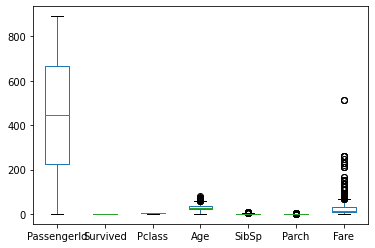

In [35]:
df.plot(kind = 'box')

Above figure infers Fare column has outlier

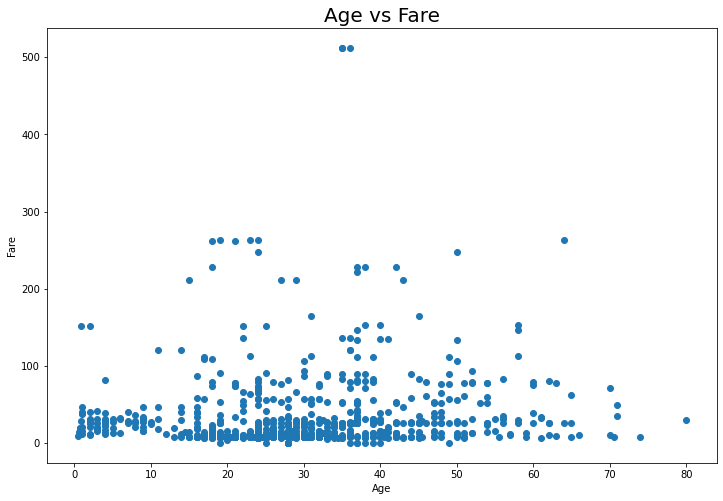

In [36]:
# to plot scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare', size = 20)
plt.show()

In [37]:
df[df['Fare'] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


There are three passengers who belongs to first class, fare are more than 500 british pounds, We have to replace the fare with mean value of first class passenger's fair

In [38]:
df[(df['Pclass'] == 1) & (df['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,37.0,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,37.0,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [39]:
df[(df['Pclass'] == 2) & (df['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,28.0,0,0,239856,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,28.0,0,0,239855,0.0,NaN,S


In [40]:
df[(df['Pclass'] == 3) & (df['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


There are passengers in all three classes with 0 fair, we have to replace the fair values with mean of fair based on their classes

In [41]:
# to find mean fair for each class exlude fair 0
first_class_fair = df[(df['Pclass'] == 1) & (df['Fare'] > 0)]['Fare'].mean()
second_class_fair = df[(df['Pclass'] == 2) & (df['Fare'] > 0)]['Fare'].mean()
third_class_fair = df[(df['Pclass'] == 3) & (df['Fare'] > 0)]['Fare'].mean()
first_class_fair, second_class_fair, third_class_fair

(86.14887440758294, 21.358661235955054, 13.7878749486653)

In [42]:
# Function to replace outlier in Fare
def replace_outlier_fair(col):
    fair = col[0]
    pcls = col[1]
    
    if fair == 0:
        if pcls == 1:
            return 84.15
        elif pcls == 2:
            return 21.36
        else:
            return 13.79
    elif fair > 400:
        return 84.15
    else:
        return fair

In [43]:
df['Fare'] = df[['Fare', 'Pclass']].apply(replace_outlier_fair, axis = 1)

Outlier replaced with related data

In [44]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Remove unwanted columns

In [45]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [46]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


### One-hot encoding

In [47]:
# replace string with numerical value
df['Sex'] = df['Sex'].replace({
    'male':1,
    'female':0
})

In [48]:
df['Embarked'] = df['Embarked'].replace({
    'S':0,
    'C':1,
    'Q':2
})

In [49]:
# drop null values by row
df.dropna(axis = 0, inplace = True)

In [50]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

Now we have cleaned data

### Train

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# split data into X and y
X = df.drop(['Survived'], axis = 1).copy()
y = df['Survived'].copy()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0, stratify= y)

In [54]:
print(f'Total number of training data :{len(y_train)} \nTotal numer of testing data :{len(y_test)}')

Total number of training data :622 
Total numer of testing data :267


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log_model = LogisticRegression().fit(X_train, y_train)

### Test

In [57]:
# to predict values
pred = log_model.predict(X_test)

### Accuracy

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
# to see confusion matrix
print(confusion_matrix(y_test, pred))

[[146  19]
 [ 27  75]]


In [60]:
from sklearn.metrics import roc_auc_score, roc_curve

In [61]:
# to generate roc curve
def generate_roc_curve(model, X_test):
    plt.figure(figsize = (10, 7))
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color = 'red', label = 'ROC Score :'+ str(roc_score))
    plt.title('ROC Curve', size = 15)
    plt.legend(loc = 4)
    plt.show()

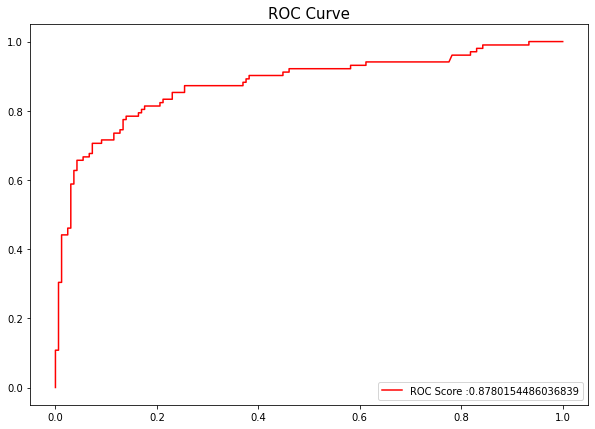

In [62]:
generate_roc_curve(log_model, X_test)

In [63]:
print(f'Accuracy score :{accuracy_score(y_test, pred) * 100}')

Accuracy score :82.77153558052434


### Results

There are 342 passengers survived and 549 passengers are not survived

More Female passengers are survived than Male passengers

19% of Male passengers and 74% of Female passengers are survived

Maximum age of Female passengers around 65 whereas Male passengers around 80

Passengers belongs to class 1 have more survival rate whereas passengers from class 2 and class 3 have less survival rate

More number of passengers have age range between 15 and 40

More passengers travelled to Southampton and less passengers travelled to Queenstown

Passengers travelled to Southampton and Queenstown mostly used class 3 whereas passengers travelled to Cherbourg mostly used class 1